In [ ]:
'''
URJC / GIA / Aprendizaje Automático 1 / Curso 23-24
alfredo.cuesta@urjc.es
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix
seed = 1460

plt.rcParams['figure.figsize']=(5,5)
np.set_printoptions(precision=2)
pd.set_option("display.precision", 4)

# ¿Cómo de bueno es mi modelo?

Una vez hemos aprendido un modelo, ya sea para regresión o para clasificación, debemos reportar su calidad.

Además, en caso de haber aprendido varios, necesitamos una medida para elegir el que finalmente implementemos en el sistema que se pretender desplegar.

El módulo `sklearn.metrics` implenta todas las métricas que vamos a aprender y otras tantas.

# Calidad de los modelos de regresión

La métrica típica en regresión es el valor $R^2$ (o R2)
$$R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{N} (y^{(i)} - \hat{y}^{(i)})^2}{\sum_{i=1}^{N} (y^{(i)} - \bar{y})^2}$$

donde $\bar{y}$ es la media de los valores de $y$; y (como siempre) $\hat y^{(i)}$ es la estimación del modelo para el ejemplo $i$-ésimo.

A la diferencia $(y^{(i)} - \hat{y}^{(i)})$ se le suele llamar **residuo**.

Si dividimos la expresión de R2 arriba y abajo por $N$ entonces el numerador es el promedio de los residuos y el denominador es la varianza del valor _target_.

Por tanto, con esa división estamos comparando el cuadrado de los residuos (los errores que cometemos al predecir el _target_ de cada ejemplo) con la dispersión de los _targets_ respecto de su media.

$R^2 = 1$ sólo si todos los residuos son 0. Por tanto, cuanto más cercano a 1, mejor es nuestro modelo.

Se encuentra implementado en `sklearn.metrics.r2_score`.

TAMBIÉN se puede utilizar la propia función de pérdida para estimar la calidad del modelo. <br>
El "problema" es que NO devuelven un valor acotado; su valor depende de los datos.

><u>_Ejemplo_</u>.<br>
 Para un problema podemos tener un MAE de 12.4 mientras que para otro problema puede ser de 542.<br>
 Sin embargo el valor máximo de $R^2$ siempre es 1.

# Calidad de los modelos de clasificación binaria

Cuando sólo hay que predecir entre dos clases (positiva y negativa) podemos acertar de dos maneras y fallar de dos maneras también.<br>
Dado un ejemplo:
- Aciertos:
  - **Verdadero positivo**, _True Positive_, TP:<br>
  $\hat y = + \quad,\quad y = +$ <BR>
  Mi estimación es "Positivo" y la clase es "Positiva"
  - **Verdadero negativo**, _True Negative_, TN:<br>
  $\hat y = - \quad,\quad y = -$ <BR>
  Mi estimación es "Negativo" y la clase es "Negativa"
- Fallos:
  - **Falso positivo**, _False Positive_, FP:<br>
  $\hat y = + \quad,\quad y = -$ <BR>
  Mi estimación es "Positivo" y la clase es "Negativa"
  - **Falso negativo**, _False Negative_, FN:<br>
  $\hat y = - \quad,\quad y = +$ <BR>
  Mi estimación es "Negativo" y la clase es "Positiva"

Haciendo un recuento para cada ejemplo del conjunto de test, podemos escribir los cuatro casos en una tabla llamada **matriz de confusión**.



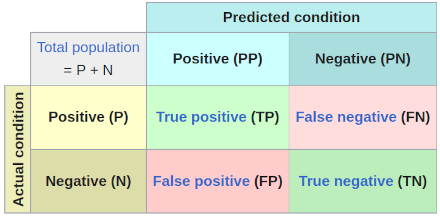

## Medidas derivadas de la matriz de confusión

En la figura de abajo se muestran varias medidas que se calculan a partir de la terna (TP, TN, FP, FN).

Las más frecuentes son:
- **_Precision_**<br>
_Precision_=1 significa que todos los ejemplo estimados como positivos efectivamente lo eran.
- **_Recall_**<bR>
_Recall_=1 significa que todos los ejemplos positivos han sido estimados correctamente.
- **_F1-score_**<br>
Da una media entre _Precision_ y _Recall_.
- **_Accuracy_**<br>
Es el porcentaje total de aciertos.


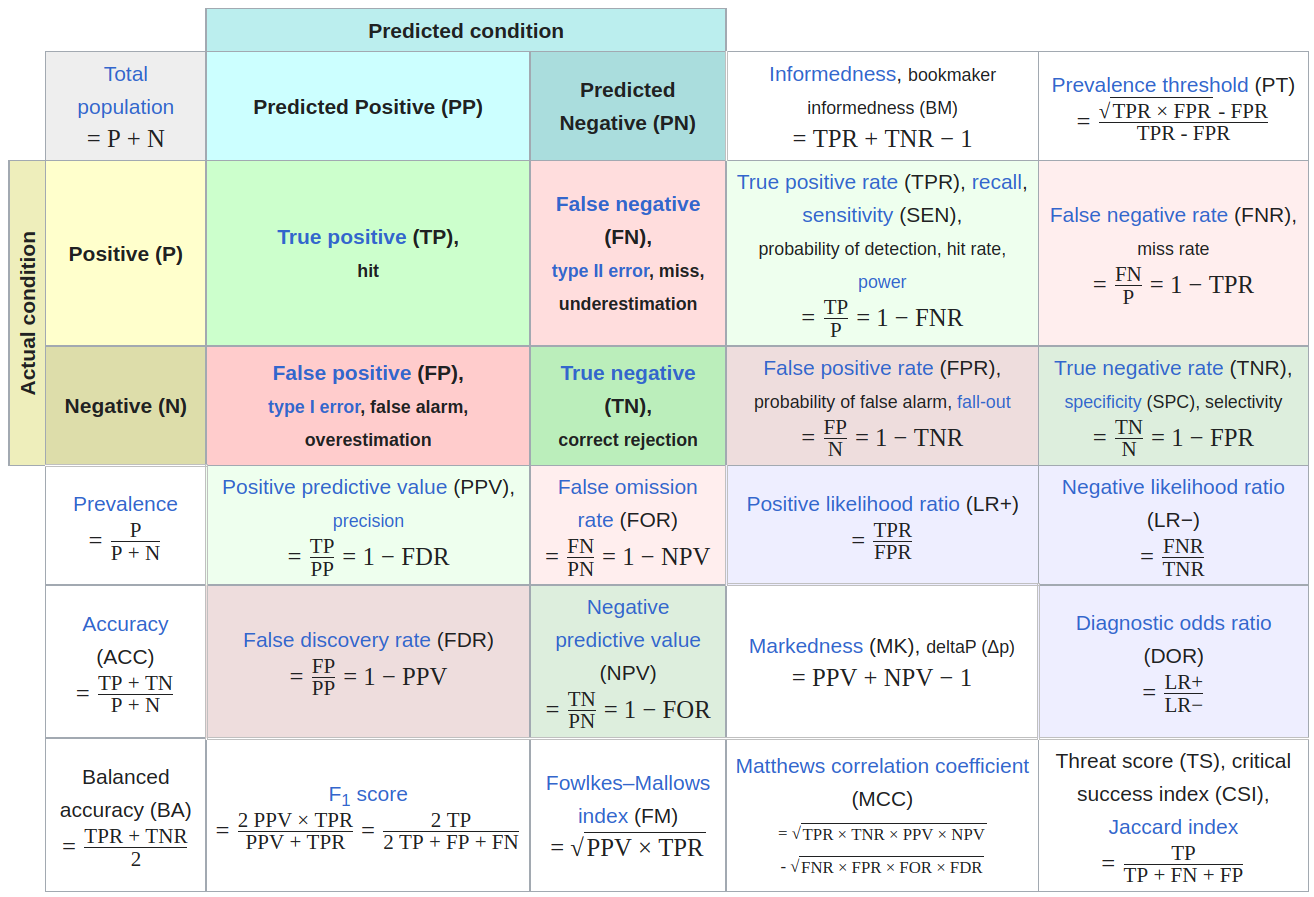

## Curva ROC y AUROC

Dado un modelo que estima la probabilidad $~p(y=1|{\bf x})~$,
tal que $~\hat y = 1~$ si $~p(y=1|{\bf x})>\theta~$; <br>
la **curva ROC** es el trazado de pares (FPR, TPR) cuando hacemos variar el umbral $0 < \theta < 1.$

La curva ROC es diferente a la matriz de confusión porque se calcula para todo el rango de posibles umbrales $\theta$, mientras que la matriz de confusión ya asume un $\theta$ fijado.

Gracias a ello, si elegimos el umbral que da lugar al par (FPR, TPR) más cercano al punto (0,1) estaremos tomando un buen compromiso de rendimiento.

Por otro lado, midiendo el área bajo la curva ROC (_Area Under ROC_, AUROC) podemos comparar modelos:
cuanto **mayor** sea **AUROC**, **mejor** es el **modelo**.

### Ejemplo

En este ejemplo calculamos la curva ROC y el AUROC para la clasificación del Iris versicolor (etiquetado como "1" en el conjunto de datos original) utilizando regresión logística.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix
seed = 1460

In [ ]:
# Cargar el conjunto de datos Iris
data = load_iris()

# Acceder a los atributos del conjunto de datos
X = data.data    # Matriz de características (150 muestras x 4 características)
Y = data.target  # Vector de etiquetas (150 etiquetas)

# Nombres de las características y nombres de las clases
feature_names = data.feature_names
target_names = data.target_names

# Cambiar etiquetas:
#  1 para la clase original 1
#  0 para el resto de clases
label_selected = 'setosa' #<- setosa, versicolor, virginica
y_selected = np.where(target_names == label_selected)[0][0]
Y[Y==y_selected] = -1
Y[Y>0] = 0
Y[Y<0] = 1

# convertir en 1 dataframe
fullSet = pd.concat([pd.DataFrame(Y, columns = ['label']),
                     pd.DataFrame(X, columns = feature_names)], axis=1)
target = fullSet.columns[0]
features = fullSet.columns[1:]

# separar entrenamiento y test
test_size = 0.15
trainX, testX, trainY, testY = train_test_split(fullSet[features], fullSet[target],
                                                test_size=test_size,
                                                shuffle = True,
                                                stratify = fullSet[target],
                                                random_state=seed)


      label     y_score
109      0  7.3888e-05
140      0  1.9772e-04
128      0  2.2911e-04
112      0  2.8831e-04
136      0  3.0285e-04
134      0  4.2185e-04
116      0  4.3321e-04
114      0  6.7620e-04
127      0  1.9483e-03
63       0  4.0591e-03
78       0  6.0054e-03
94       0  1.3949e-02
71       0  1.9197e-02
80       0  3.2420e-02
79       0  7.2928e-02
44       1  9.4692e-01
20       1  9.5454e-01
25       1  9.5636e-01
26       1  9.6251e-01
41       1  9.6317e-01
12       1  9.7613e-01
15       1  9.8277e-01
16       1  9.8496e-01

    fpr    tpr          th
0  0.0  0.000  1.9850e+00
1  0.0  0.125  9.8496e-01
2  0.0  1.000  9.4692e-01
3  1.0  1.000  7.3888e-05

AUROC 1.000


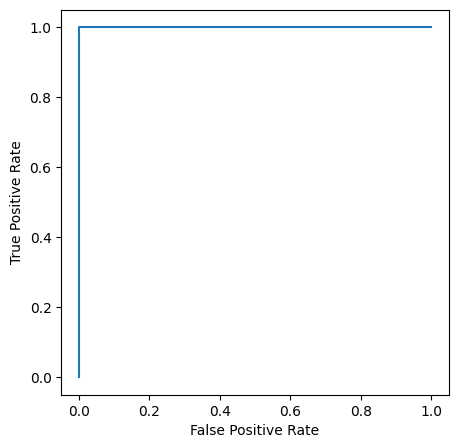

In [ ]:
# Entrenamiento del modelo de regresión logística
model = LogisticRegression()
model.fit(trainX, trainY)

# Cálculo de las probabilidades
y_score = model.predict_proba(testX)[:, 1]

# Cálculo de la curva ROC y AUC
fpr, tpr, thresholds = roc_curve(testY, y_score)
roc_auc = auc(fpr, tpr)

# Visualización de la curva ROC
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Mostrar resultados

print('\n', pd.concat([testY,
                       pd.DataFrame({'y_score':y_score}).set_index(testY.index)],
                      axis=1).sort_values(['y_score'])
      )

print('\n',
      pd.DataFrame({'fpr':fpr,
                    'tpr':tpr,
                    'th':thresholds}))

print(f'\nAUROC {roc_auc:0.3f}')


El motivo de que la curva tenga ese aspecto de escalera es que se ha calculado sobre los ejemplos de test, que son "pocos".

Al ver `y_score` ordenado nos damos cuenta de que, si comenzamos con un umbral = 0 tenemos un TPR del 100%.<br>
Cuando lo subimos hasta 0.265513 hay dos ejemplos de la clase positiva que hemos clasificado incorrectamente como negativos, por tanto tenemos 6 aciertos sobre 8 positivos que hay, es decir el 75% de fpr.

Una vez seleccionamos un umbral de probabilidad, podemos estimar las etiquetas de los ejemplos de test y escribir la matriz de confusión.

In [ ]:
th_selected = 0.5
y_pred = (y_score>=th_selected)*1
print(f'Matriz de confusión\n{pd.DataFrame(confusion_matrix(testY, y_pred))}')


Matriz de confusión
    0  1
0  15  0
1   0  8



**Prueba lo siguiente**
1. Modifica el código para ver la curva ROC sobre el conjunto de datos completo (train+test)
2. Modifica el código para ver la curva ROC del clasificador de _virginica_ y _setosa_

# Ejercicios

En el código del ejemplo dejamos a Python calcular los umbrales. La otra opción sería hacer un barrido del umbral desde 0 hasta 1 calculando para cada caso el TPR y el FPR.
Como hay pocos ejemplos de test, el aspecto de la curva ROC seguirá siendo escalonado, pero un poco menos.
¿Cómo sería el código para realizar esta curva ROC "manual"?

Calcular las métricas de rendimiento de cualquiera de los ejercicios que ya hayas hecho previamente.